В контексті аналізу алгоритмів є сенс говорити про 2 пов'язаних поняття:

* __Проблема__ - певна задача, котру треба вирішити (знайти корінь рівняння, знайти елемент у списку, вивести напис на екран тощо)
* __Алгоритм__ - чітко визначений набір дій для вирішення тої чи іншої проблеми.

Для однієї проблеми може існувати декілька алгоритмів. 

Наприклад, розглянемо проблему пошуку елементу у відсортованому списку:

In [1]:
lst = [i for i in range(10)]

Для рішення цієї проблеми відомо як мінімум два алгоритми:
* Лінійний пошук
* Бінарний пошук

In [2]:
def linear_search(arr, target):
    for index, element in enumerate(arr):
        if element == target:
            return index
    return None


In [3]:
print(linear_search(lst, 2))
print(linear_search(lst, 1000))

2
None


In [4]:
def binary_search(arr, target):
    left = 0
    right = len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return None

In [5]:
print(binary_search(lst, 2))
print(binary_search(lst, 1000))

2
None


Як ми бачимо, це два різних алгоритми, котрі працюють коректно. Як нам обрати найкращий алгоритм?
Грубо кажучи, я би виділив 3 фактори, що мають бути враховані при виборі алгоритму:
* Скільки часу виконується алгоритм __на тих даних, з котрими він буде працювати__?
* Скільки пам'яті споживає алгоритм __на тих даних, з котрими він буде працювати__?
* Наскільки складною є __правильна__ імплементація цього алгоритму?

Давайте заміряємо перший аспект для наших алгоритмів пошуку

In [6]:
range_bound = 10000

In [7]:
new_lst = [i for i in range(range_bound)]

In [8]:
import random

target = random.randint(0, range_bound)

In [9]:
%%timeit
linear_search(new_lst, target)

166 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
%%timeit
binary_search(new_lst, target)

2.3 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%%timeit
linear_search(new_lst, range_bound*2)

442 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
%%timeit
binary_search(new_lst, range_bound*2)

2.24 µs ± 91.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Як бачимо, чим більше в нас даних, тим краще працює бінарний пошук. Давайте заміряємо та візуалізуємо __залежність__ часу виконання алгоритму від кількості вхідних даних

In [13]:
from time import time
from functools import partial
from typing import Callable, Union, List

RANGE_BOUND_MAX = 350
TESTS_NUM = 5000

def function_timer(function: Callable):
    start_time = time()
    function()
    return time() - start_time

range_bounds = [i for i in range(10, RANGE_BOUND_MAX)]

def time_algs_by_mean(func: Callable, test_num: int, range_bounds: int) -> List[float]:
    algorith_times = list()
    for range_bound in range_bounds:
        arr = [i for i in range(range_bound)]
        times_for_n: List[float] = [function_timer(
        partial(func,
                arr = arr, 
                target = random.randint(0, range_bound))
        ) for _ in range(test_num)]
        mean_running_time = sum(times_for_n)/len(times_for_n)
        algorith_times.append(mean_running_time)
    return algorith_times

linear_times: List[float] = time_algs_by_mean(linear_search, TESTS_NUM, range_bounds)

binary_times: List[float] = time_algs_by_mean(binary_search, TESTS_NUM, range_bounds)

In [14]:
import matplotlib.pyplot as plt

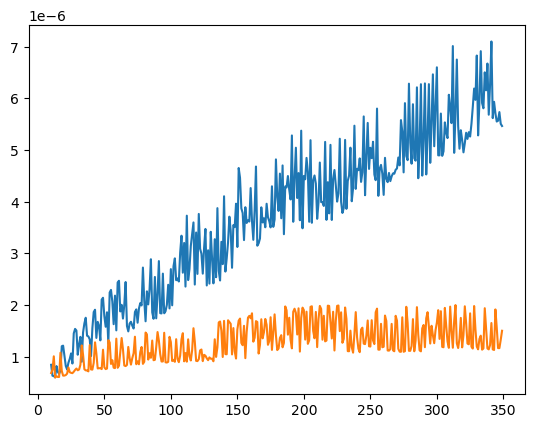

In [15]:
plt.plot(range_bounds, linear_times)
plt.plot(range_bounds, binary_times)

Можемо побачити, що чим більше розмір списку, по котрому відбувається пошук, тим більша різниця між лінійним пошуком (синя лінія) та бінарним (помаранчева лінія)

Також зверніть увагу на коливання в графіку. Вони можуть бути викликані великою кількістю причин: навантаження на процесор від інших процесів ОС, параметри конкретної машини, нерівномірний розподіл даних у процесі рандомізації тощо. 

Куди важливіше три факти:
* загальний __тренд__ у замірах
* факт того, що починаючи з певної довжини вхідних даних бінарний пошук працює набагато швидше від лінійного
* ця залежність виконується для __будь якої__ машини

Це підводить нас до важливого висновку: враховуючи кількість випадкових і недетермінованих факторів під час вимірювань, куди більш інформативним є не конкретний замір часу виконання алгоритму, а __відносне порівняння алгоритмів між собою__.

При чому, треба враховувати, що у випадку пошуку ми можемо знайти елемент на першій ітерації, другій, або на останній. Тобто, є сенс оцінювати як мінімум три види складності алгоритму по часу:

* найкращий випадок
* найгірший випадок
* середній випадок

Для цього якраз й існує Big-O нотація і процес асимптотичної оцінки алгоритмів. Також, виявляється, що різним елементам Big-O ми можемо поставити у відповідність [певні фрагменти програм](https://d3c33hcgiwev3.cloudfront.net/_9e4b178fa46f2b27f7beefbc5b1d2727_14AnalysisOfAlgorithms.pdf?Expires=1684108800&Signature=lG-nU4DFix-Kkv9Jrjm9VqMh1viZ95BthNO7gAElH38e2z3UGUGq6zkCIert71KzYIMyC5XOHjNYb1wpXjURUiMKbYokP8TS2H-eVEnMjRTKmXLDFWLkzo~YGEt5swVXyERPfWBko~7uiif-dknhBT~XEn-ZzFnnmABNTsMkSQw_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A). Також виявляється, що так само ми можемо оцінити не тільки час виконання програми, але і те, скільки па'мяті вона споживає під час цього.

Також, нагадаємо 4 правила Big-O нотації ([чудове відео з матеріалів](https://youtu.be/v4cd1O4zkGw)):

* Різні кроки обчислень додаються в загальній оцінці
* Нас не цікавлять конкретні множники і константи. Будь який константний алгоритм - О(1), будь який лінійний - О(n)
* Різні набори вхідних даних - різні змінні (буває O(m*n), O(m*n*k) etc)
* Нас цікавить найбільший порядок (не буває O(e^x + n^2 + n), це буде O(e^x))

In [16]:
def constant_time(input_var):
    for x in range(10):
        print(x)


In [17]:
def linear_time(length):
    for i in range(length):
        print(i)


In [ ]:
def another_linear_time(length):
    for n in range(length):
        print(n)

    for m in range(length):
        #Regardless of this loop, time complexity still be O(n)
        print(m)

In [18]:
def quadratic_time(length):
    for i in range(length):
        for k in range(length):
            print(i, k)


In [ ]:
def another_quadratic_time(length):
    for i in range(length):
        for k in range(length):
            print(i, k)
            
    for j in range(length):
        #Regardless of this additional loop, there will still be O(n^2) time complexity
        print(j)


In [19]:
from typing import List, Any

def multiplication_of_two_arrs(arr_1: List[Any], arr_2: List[Any]):
    for a in arr_1:
        for b in arr_2:
            # Time complexity here will be O(len(arr_1)*len(arr_2)), cause we are running loop by arr_2 for each element in arr_1
            print(a, b)
            

In [36]:
def logarithmic_time(n: int):
    while n != 0:
        print(n)
        n = n // 2
            

In [45]:
def linearithmic_time(arr):
    #Linearithmic means O(n*log(n))
    if len(arr) < 2:
        return arr
    #Here goes the logarithmic part (where we are splitting arr into two parts recursively)
    mid = len(arr)//2
    left = arr[:mid]
    right = arr[mid:]
    
    left_sorted = linearithmic_time(left)
    right_sorted = linearithmic_time(right)
    
    return merge(left_sorted, right_sorted)

def merge(left, right):
    # Here goes our linear part. 
    result = list()
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    while i < len(left):
        result.append(left[i])
        i += 1
    while j < len(right):
        result.append(right[j])
        j += 1
    return result

Як ми пам'ятаємо, програмування це сутнісно процес перетворення даних з однієї форми в іншу за якимось __алгоритмом__. Про алгоритми ми поговорили. В класичній інформатиці зазвичай ми говоримо про __структури даних__ як певний __спосіб__ збереження їх у пам'яті. Та певні __правила__ за котрими відбувається робота з даними в рамках цієї структури.

У Python, як ми пам'ятаємо, є 4 вбудовані структури даних:

* lists
* tuples
* sets
* dicts


In [1]:
l = [1, 2, 3, 4, 5]
t = (1, 2, 3, 4, 5)
s = {1, 2, 3, 4, 5}
d = {1: 2, 3: 4, 5: 6}

В рамках аналізу алгоритмів є сенс говорити про __операції__ котрі ваша структура дозволяє робити зі своїми даними. Наприклад, вставка елементу в список. Чи читання елементу з кортежу. Кожна з цих операцій так само є __алгоритмом__, а, отже, має асимптотичну оцінку як по часу, так і по пам'яті.

[Гарна звідна таблиця](https://wiki.python.org/moin/TimeComplexity) асимптотичної оцінки основних операцій з вбудованими структурами даних у Python